# The Boston Housing Dataset

Das "[Boston Housing Dataset](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)" ist aus Informationen des U.S. Census Service abgeleitet und enthält Informationen über die Wohnraumsituation im Raum Boston. Es wurde erstmals 1978 veröffentlicht. Der Datensatz ist mit 506 Einträgen relativ klein und enthält pro Eintrag folgende Werte:

| Feature Name | Description |
| :---: | :--- |
| `CRIM   ` | per capita crime rate by town |
| `ZN     ` | proportion of residential land zoned for lots over 25,000 sq.ft. |
| `INDUS  ` | proportion of non-retail business acres per town. |
| `CHAS   ` | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| `NOX    ` | nitric oxides concentration (parts per 10 million) |
| `RM     ` | average number of rooms per dwelling |
| `AGE    ` | proportion of owner-occupied units built prior to 1940 |
| `DIS    ` | weighted distances to five Boston employment centres |
| `RAD    ` | index of accessibility to radial highways |
| `TAX    ` | full-value property-tax rate per \$10,000 |
| `PTRATIO` | pupil-teacher ratio by town |
| `B      ` | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| `LSTAT  ` | % lower status of the population |
| `MEDV   ` | **median value of owner-occupied homes in \$1000's** |


## 1. Datenexploration: Daten laden und anschauen

Zunächst sollen die Daten aus dem `.csv`-File in ein [Pandas-Dataframe](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) geladen werden. Pandas ist ein mittlerweile weitverbreitetes Tool zur Datenanalyse in Python:

>pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.  

*[https://pandas.pydata.org/](https://pandas.pydata.org/)*

Pandas ist in der Lage, viele Datenformate über die Funktionen `pandas.read_<Format>` direkt in Dataframes zur weiteren Verarbeitung zu laden. In diesem Beispiel ist zu beachten, dass die Werte in der CSV Datei durch mehrere Whitespaces getrennt sind (keine fixe Anzahl) und dass die CSV Datei keinen Header hat, die Spalten-Namen müssen also manuell hinzugefügt werden.

In [1]:
import pandas as pd 

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
                'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('boston-housing-dataset.csv', header=None, delim_whitespace=True, names=column_names)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 1.1 Datenübersicht

Pandas bietet durch die Dataframe-Methode `.describe()` eine einfache Art, einen ersten Überblick über die Daten zu bekommen:

In [2]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Hierbei wird angegeben:
- `count`: Wieviele Einträge sind vorhanden
- `mean`: Mittelwert über alle Einträge einer Spalte
- `std`: Standardabweichung über alle Einträge einer Spalte(Schwankungsbreite um den Mittelwert)
- `min/max`: Minimal-/Maximalwert aller Einträge  einer Spalte
- `25%/50%/75%`-Quantile: Gibt die Werte aus einer Spalte an, die gerade so groß sind, dass 25%/50%/75% aller Werte kleiner sind. Das 50%-Quantil heißt auch Median.

**Aufgabe: Was fällt euch bzgl. der Beschreibung der Spalten `ZN`, `CHAS`, und `MEDV` auf?**

*Lösung:*
- `ZN`: 25%- und 50%-Quantil sind Null, d.h. mindestens 50% aller Werte sind Null. Ein solches Ungleichgewicht von Werten in einer Spalte kann großen Einfluss auf das Trainieren von bestimmten Modellen haben!
- `CHAS`: Diese Spalte nimmt nur Werte zwischen 0 und 1 an. Wie aus der Beschreibung des Datensatzes hervorgeht, ist es ein binäres Feature. Auch hier gibt es ein Ungleichgewicht, der MIttelwert von ~0.07 deutet an, dass nur 7% aller Einträge gleich 1 sind.
- `MEDV`: Obwohl diese Spalte den Durchschnittswert von Häsuern angibt, ist der Maximalwert glatt 50. Hier liegt nahe, dass der Datensatz "zensiert" wurde, dass also alle Werte >50 künstlich auf 50 gesetzt wurde.

### 1.2 Datenverteilung visualisieren

Um die über die Beschreibung der Daten vermuteten Eingenheiten des Daten besser zu verstehen, eignet sich eine Visualisierung der Häufigkeiten der einzelnen Werte jeder Spalte über ein Histogramm. Dabei die Python-Library [`seaborn`](https://seaborn.pydata.org/) verwendet, die speziell für die statistische Visualisierung von Daten erstellt wurde. Seaborn selbst greift unter der Haube auf die Library `matplotlib` zurück. Letztere lässt sich am besten nutzen, wenn sie über `import matplotlib.pyplot as plt` importiert wird, dann stehen alle wichtigen Funktionalitäten leicht über `plt.<Funktion>` zur Verfügung und man muss nicht durch die Namespaces der vielen Untermodule navigieren.

*Zusatz: Für das Zusammenfügen aller Histogramme in eine einzige Abbildung kann die Funktion `plt.subplots` verwendet werden (unabhängig davon, ob die Einzelhistogramme mit Seaborn oder Matplotlib erzeugt wurden).*

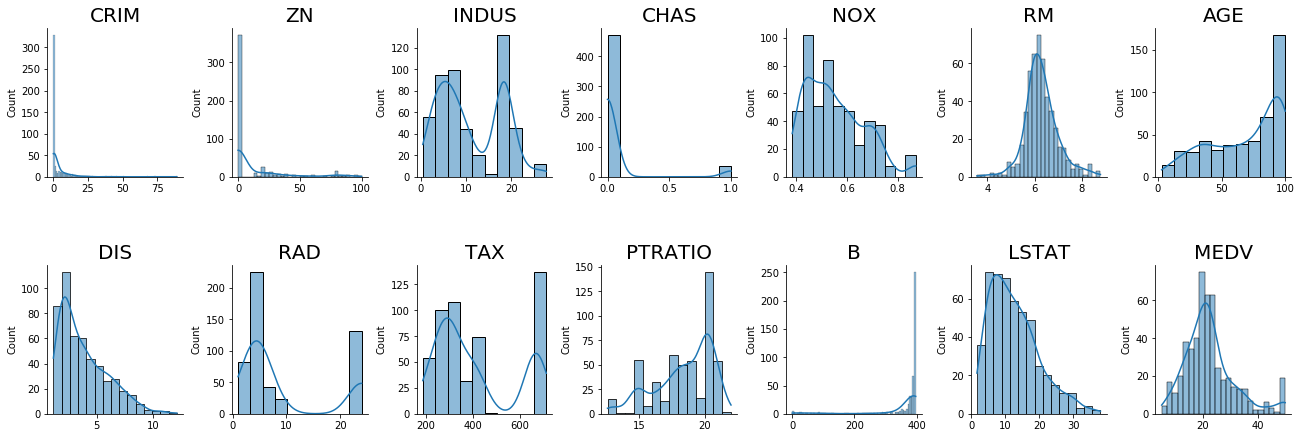

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(18, 6))
axes = axes.flatten()

for i, (column_name, column_data) in enumerate(data.items()):
    sns.histplot(column_data, ax=axes[i], kde=True)
    
    # Plot styling
    axes[i].set_title(column_name, fontsize=20)
    axes[i].set_xlabel('')
    
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 1.3 Darstellung von Korrelationen

Neben der Verteilung der Datenpunkte ist die Korrelation untereinander wichtig für das Trainieren von Machine Learning Modellen. Positive Korrelation zwischen Spalte A und Spalte B bedeutet dabei, dass die Werte in Spalte A überdurchschnittlich groß sind, wenn auch die zugehörigen Werte in Spalte B überdurchschnittlich groß sind (Gleiches gilt für die kleinen Werte). Negative Korrelation bedeutet, dass ein überdurchschnittlicher Wert in Spalte A wahrscheinlich neben einem unterdurchschnittlichen Wert in Spalte B steht (die Werte sind also "gegenläufig"). Ist die Korrelation gleich oder nahe Null, lässt sich aus den Werten in Spalte A kein *direkter* Rückschluss über die Werte in Spalte B ziehen.

Für die Vorhersage der Hauspreise ist es also wichtig, dass einige der Spalten eine starke Korrelation (egal ob positiv oder negativ) mit der letzten Spalte (welche die Hauspreise der Trainingsdaten enthält). Mit Hilfe von Pandas kann direkt eine Korrelationsmatrix des Dataframes erstellt und die Absolutwerte der darin enthaltenen Korrelationskoeffizienten berechnet werden. Eine geeignete Darstellung liefert dann die "Heatmap" aus der `seaborn` Library.

- Die beiden Spalten `LSTAT` und `RM` weisen die stärkste Korrelation mit den Hauspreisen (`MEDV`) auf und bieten daher großes Potential für Vorhersagen
- `B` ist eine Kenngröße über den Anteil der afroamerikanischen Bevölkerung. Zwar ist eine schwache Korrelation zwischen dieser Kenngröße und den Hauspreisen gegeben, allerdings ist die Verwendung dieser Größe als Feature ethisch sehr problematisch, da das so trainierte Modell möglicherweise bestehende Vorurteile bestärkt und damit ethischen Bias enthält.

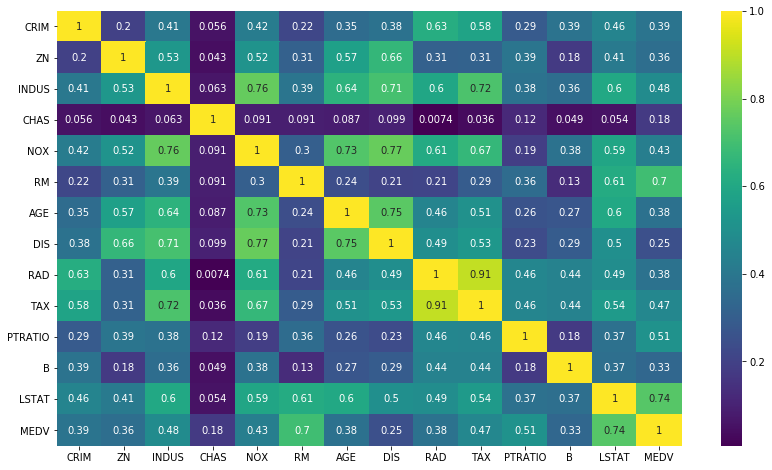

In [4]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr().abs(), annot=True, cmap='viridis');

## 2. Modell Training

Im folgenden werden einige Grundschritte des Trainings von Machine Learning Modellen durchgegangen und dazu wird die Library [`scikit-learn`](https://scikit-learn.org/stable/) verwendet, die eine breite Auswahl an Regressions-, Classifikations-, und Clustering-Modellen mitbringt und sowohl supervised- als auch unsupervised Machine Learning Methoden unterstützt. Für die Hauspreis-Vorhersage werden zwei verschiedene Modelle verglichen, die lineare Regression und einen Random Forest.

### 2.1 Train/Test split

Bevor ein Machine Learning Modell trainiert werden kann, muss festgelegt werden, welcher Teil der Daten für das Training benutzt wird, und welcher Teil dem Modell zunächst vorenthalten wird, um später testen zu können, wie gut das Modell Häuser bewerten kann, die es vorher noch nicht gesehen hat. Diese Trennung der Daten ist äußerst wichtig, da viele Machine Learning Methoden über soviele freie Parameter verfügen, dass sie auch "auswendig lernen" können. Würde mit denselben Daten trainiert und anschließend das Modell testen werden, dann würde man hervorragende Ergebnisse erzielen, die allerdings niemals beim Kunden der das Modell nutzt ankommen würden, da die Kunden dem Modell Daten liefern, die es so noch nie gesehen hat!

Um die Daten für das Modelltraining mit `scikit-learn` (wird in Python importiert als `sklearn`) vorzubereiten, muss man zunächst die Daten in Features `X` (die Spalten, anhand derer man den Hauspreis vorhersagen will) und Labels `y` (die Spalte, die man vorhersagen will) trennen.

Danach kann man die Daten mit der Funktion `sklearn.model_selection.train_test_split` in 80% Trainingsdaten und 20% Testdaten aufteilen. Tipp: Die Trennung erfolgt zufällig, für eine bessere Reproduzierbarkeit lohnt es sich, via dem Parameter `random_state` ein Seed zu setzen.

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop('MEDV', axis='columns')
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
X_train.shape

(404, 13)

In [7]:
X_test.shape

(102, 13)

In [8]:
y_train.shape

(404,)

In [9]:
y_test.shape

(102,)

### 2.2 Lineare Regression

Bei der linearen Regression versuchen wir, den Hauspreis durch eine gewichtete Summe der Features (+ Offset) auszudrücken, also:

$\text{MEDV} = w_0 ~+~ w_1 \cdot \text{LSTAT} ~+~ w_2 \cdot \text{RM} ~+~ ...$

Die Gewichte $w_i$ werden dabei so optimiert, dass die quadratische Abweichung der Vorhersage zu den tatsächlichen Hauspreisen in den Trainingsdaten minimal wird.

**Aufgabe: nutze die Klasse `sklearn.linear_model.LinearRegression` um ein lineares Modell an die Trainingsdaten zu fitten. Gib die trainierten Koeffizienten ($w_1$...$w_n$) sowie den Offset/Intercept ($w_0$) im Notebook aus, und nutze das trainerte Modell um Vorhersagen für `X_test` zu erstellen.**

In [10]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [11]:
linreg.coef_

array([-1.12386867e-01,  5.80587074e-02,  1.83593559e-02,  2.12997760e+00,
       -1.95811012e+01,  3.09546166e+00,  4.45265228e-03, -1.50047624e+00,
        3.05358969e-01, -1.11230879e-02, -9.89007562e-01,  7.32130017e-03,
       -5.44644997e-01])

In [12]:
linreg.intercept_

42.93352585337752

In [13]:
y_test_pred_linreg = linreg.predict(X_test)
y_test_pred_linreg

array([32.65503184, 28.0934953 , 18.02901829, 21.47671576, 18.8254387 ,
       19.87997758, 32.42014863, 18.06597765, 24.42277848, 27.00977832,
       27.04081017, 28.75196794, 21.15677699, 26.85200196, 23.38835945,
       20.66241266, 17.33082198, 38.24813601, 30.50550873,  8.74436733,
       20.80203902, 16.26328126, 25.21805656, 24.85175752, 31.384365  ,
       10.71311063, 13.80434635, 16.65930389, 36.52625779, 14.66750528,
       21.12114902, 13.95558618, 43.16210242, 17.97539649, 21.80116017,
       20.58294808, 17.59938821, 27.2212319 ,  9.46139365, 19.82963781,
       24.30751863, 21.18528812, 29.57235682, 16.3431752 , 19.31483171,
       14.56343172, 39.20885479, 18.10887551, 25.91223267, 20.33018802,
       25.16282007, 24.42921237, 25.07123258, 26.6603279 ,  4.56151258,
       24.0818735 , 10.88682673, 26.88926656, 16.85598381, 35.88704363,
       19.55733853, 27.51928921, 16.58436103, 18.77551029, 11.13872875,
       32.36392607, 36.72833773, 21.95924582, 24.57949647, 25.14

### 2.3 Modell-Evaluation

`scikit-learn` bietet verschiedene Möglichkeiten, die Genaunigkeit der erstellten Vorhersagen zu quantifizieren. Bei einem Regressionproblem wie diesem bieten sich zwei Evaluationsmetriken an:
- Mean Squared Error (MSE): Die quadratische Abweichung zwischen tatsächlichem Wert (`y_test`) und der Vorhersage (`y_test_pred_linreg`). Um einen interpretierbaren Wert in US-Dollar zu bekommen, kann danach noch die Wurzel gezogen werden, damit nennt sich die Metrik dann "Root Mean Square Error (RMSE)".
- Mean Absolute Percentage Error (MAPE): Hier wird die mittlere prozentuale Abweichung zwischen tatsächlichem Wert und der Vorhersage bestimmt.

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse_linreg = mean_squared_error(y_test, y_test_pred_linreg, squared=False)
print('RMSE of predicted house price = +-{} USD'.format(int(1000*rmse_linreg)))

mape_linreg = mean_absolute_percentage_error(y_test, y_test_pred_linreg)
print('MAPE of predicted house price = +-{:.1f} %'.format(100*mape_linreg))

RMSE of predicted house price = +-4835 USD
MAPE of predicted house price = +-18.8 %


### 2.4 Random Forest

Neben der linearen Regression soll eine zweite Regressionsmethode angewendet werden: Einen Random-Forest Regressor, der auf Entscheidungsbäumen aufbaut. Dieser hat den Vorteil, dass seine Genauigkeit anders als bei der linearen Regression nicht durch sehr asymmetrische Verteilungen der Features beeinflusst wird.

Der Random Forest Regressor ist bei diesem Beispiel in der Lage, bessere Vorhersagen zu erstellen als die lineare Regression. Hierfür können zwei mögliche Gründe genant werden:
- Die asymmetrischen Verteilungen mancher Features können einen linearen Fit beeinträchtigen. Hier könnte eine Umskalierung der Features (z.B. über die Funktion `log(1 + x)` helfen).
- Die Zusammenhänge der Features und der Hauspreise sind zum Teil nicht-linear. Hier würde es helfen, die Hauspreise gegen die einzelnen Features zu plotten und versuchen, durch geeignete Transformationen (wie etwa `sqrt` oder `**2`) eine lineare Abhängigkeit zu erzeugen.

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

y_test_pred_rf = rf.predict(X_test)

In [16]:
rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
print('RMSE of predicted house price = +-{} USD'.format(int(1000*rmse_rf)))

mape_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)
print('MAPE of predicted house price = +-{:.1f} %'.format(100*mape_rf))

RMSE of predicted house price = +-2986 USD
MAPE of predicted house price = +-12.5 %


### 2.5 Feature importance

Durch die Korrelationsmatrix wurde ermittelt, dass die beiden Spalten `LSTAT` und `RM` die stärkste Korrelation mit den Hauspreisen aufweisen und daher vermutlich am wichtigsten für die Vorhersage werden. Der trainierte Random Forest bietet über das Attribut `RandomForestRegressor.feature_importances_` Zugriff auf die sog. "Feature importances", also auf welche Features der Random Forest seine Vorhersagen am meisten stützt.

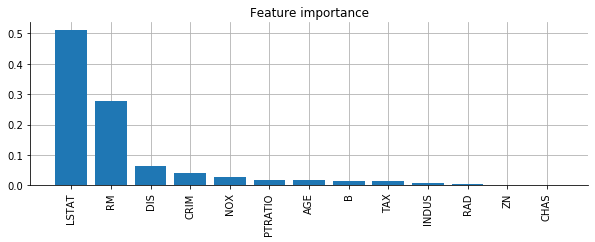

In [17]:
import numpy as np

feature_names = np.array(X_train.columns)
feature_importances = rf.feature_importances_

ordering = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 3))
plt.bar(range(len(feature_names)), feature_importances[ordering], zorder=2)

# Plot styling
plt.xticks(range(len(feature_names)), feature_names[ordering], rotation=90)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Feature importance')
plt.grid();

### 2.5 Visuelle Modell-Evaluation

Als letzte werden alle Vorhersagen zusammen mit den echten Hauspreisen visualisiert, um eine bessere Intuition über die Genauigkeit der Vorhersagen zu gewinnen. RMSE und MAPE sind zwar gängige Metriken zum Bewerten von Regressions-Modellen, aber sie fassen die Genauigkeit stets zu einem einzigen Wert zusammen und geben keinen Aufschluss darüber, ob es vielleicht Ausreißer unter den Vorhersagen gibt.

Generell kann festgestellt werden, dass niedrige Hauspreise eher überschätzt und hohe Hauspreise fast ausschließlich unterschätzt werden. Hier könnte es helfen, die Verteilung der Hauspreise für das Training auszugleichen durch zufälliges Ziehen wobei die seltenen Werte etwas bevorzugt werden. Eine weitere Verbesserung könnte durch das Hyperparameter-Tuning  des Random Forests erreicht werden (siehe Ausblick).

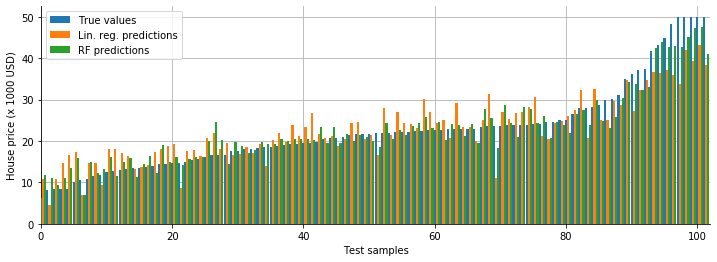

In [18]:
ordering = np.argsort(y_test)

plt.figure(figsize=(12, 4))

plt.bar(np.arange(len(y_test)), y_test.iloc[ordering], width=0.33, label='True values', zorder=3)
plt.bar(np.arange(len(y_test))+0.33, y_test_pred_linreg[ordering], width=0.33, label='Lin. reg. predictions', zorder=3)
plt.bar(np.arange(len(y_test))+0.66, y_test_pred_rf[ordering], width=0.33, label='RF predictions', zorder=3)

# Plot styling
plt.xlim([0, len(y_test)])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc='upper left')
plt.xlabel('Test samples')
plt.ylabel('House price (x 1000 USD)')
plt.grid()

## 3. Ausblick Hyperparameter Tuning: Wieviele Bäume braucht ein Random Forest?

In diesem Beispiel wurde ein wichtiger Aspekt außen vorgelassen: Modelle wie lineare Regression und der Random Forest lernen nicht nur Parameterwerte (wie etwa die Koeffizienten $w_i$), sondern besitzen selbst Parameter die bestimmen wie genau das Training abläuft - die sog. Hyperparameter.

Beim Random Forest ist das Training durch folgende Liste an Hyperparametern bestimmt:

In [19]:
rf = RandomForestRegressor(random_state=1)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

`scikit-learn` bietet einige Werkzeuge, um auch diese Parameter leicht zu optimieren und so bessere Ergebnisse mit derselben Methode erreichen zu können. Bei realen Anwendungen mit komplizierteren Datensätzen ist Hyperparameter-Tuning in der Regel ein Muss!

Die einfachste Art des Hyperparameter-Tunings ist dabei die "Grid Search": Man gibt eine Reihe von Hyperparameter-Kombinationen vor und für jede Kombination wird ein Modell trainiert. Das Problem hierbei ist, die Qualität des Modells zu bewerten, da hierbei ja noch nicht auf das Testset zugegriffen werden soll. Dafür nutzt `scikit-learn` Cross-Validation, es trainiert also jeweils z.B. 4 Modelle wobei abwechselnd 25% der Daten vorenthalten werden, auf denen nach dem Training die Qualität bestimmt wird.

Im Folgenden kann man sich die Frage stellen: Wie viele Bäume braucht ein Random Forest beim Boston Housing Problem? Dafür wird der Hyperparameter `n_estimators` getunt, der die Anzahl der Bäume im Random Forest angibt. Anschließend können die jeweiligen Qualitätswerte extrahiert und visualisiert werden.

In [20]:
from sklearn.model_selection import GridSearchCV

tuned_rf = GridSearchCV(rf, param_grid={'n_estimators': [10, 20, 50, 100, 200, 400, 1000]}, cv=4, refit=True)
tuned_rf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=1),
             param_grid={'n_estimators': [10, 20, 50, 100, 200, 400, 1000]})

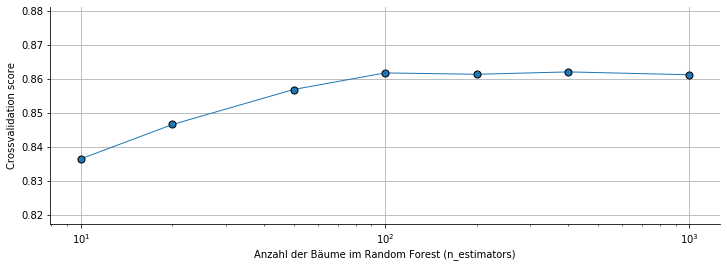

In [21]:
n_est = [x['n_estimators'] for x in tuned_rf.cv_results_['params']]
score = tuned_rf.cv_results_['mean_test_score']

plt.figure(figsize=(12, 4))
plt.scatter(n_est, score, zorder=3, s=50, lw=1, edgecolor='k')
plt.plot(n_est, score, zorder=2, lw=1)
plt.xscale('log')

# Plot styling
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Anzahl der Bäume im Random Forest (n_estimators)')
plt.ylabel('Crossvalidation score')
plt.grid()

Wie man sehen kann, ist der Default-Wert `n_estimators=100` des Random Forests in `scikit-learn` bereits sehr gut auf dieses Beispiel abgestimmt. Ab einer Zahl von 100 Bäumen stagniert die Qualität der Vorhersagen. Dies liegt auch daran, dass `scikit-learn` das Boston Housing Dataset als eines ihrer Beispiel-Benchmarks verwendet.